<a href="https://colab.research.google.com/github/WilliamAshbee/DatascienceHomeworks/blob/main/Copy_of_HW1_Ashbee_William.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 1 - Data Exploration using Census Data

In this homework assignment you will use census data from the 1994 and 1995 current population surveys conducted by the U.S. Census Bureau. A copy of this dataset is located at UCI Machine Learning repository, please see this [link](https://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29) to reach to the dataset website.

This dataset contains census data extracted from the 1994 and 1995 Current Population Surveys. We will only work with 'training' data (a link to that is provided to you below). The data contains 41 demographic and employment related variables. The abbreviated column names provided to you below. You are expected to read the documentation of this dataset, understand the features and preprocess this dataset. Additional information can be found [in the data description](https://archive.ics.uci.edu/ml/machine-learning-databases/census-income-mld/census-income.data.html) and [additional comments](https://archive.ics.uci.edu/ml/machine-learning-databases/census-income-mld/census-income.names).

Below you will find a code snippet to download and read the data into a pandas dataframe. You can alternatively download it yourself, extract and read it manually. The questions are shown in the subsequent cells. You can provide your answers in this file. Make sure to change the notebook's name and add your name before submitting.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import urllib.request
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/census-income-mld/census-income.data.gz'
census_dl_file = './census-income.data.gz'
urllib.request.urlretrieve(url, census_dl_file)

('./census-income.data.gz', <http.client.HTTPMessage at 0x7fd0ed819dd0>)

In [3]:
columns_abbr = ['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC',
                'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 
                'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MARSUPWT', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 
                'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 
                'VETQVA', 'VETYN', 'WKSWORK', 'YEAR', 'PTOTVALB']

In [4]:
df = pd.read_csv('census-income.data.gz', compression='gzip', names=columns_abbr, sep=r',', skipinitialspace=True)
df.head()


,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,AUNTYPE,AWKSTAT,CAPGAIN,CAPLOSS,DIVVAL,FILESTAT,GRINREG,GRINST,HHDFMX,HHDREL,MARSUPWT,MIGMTR1,MIGMTR3,MIGMTR4,MIGSAME,MIGSUN,NOEMP,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,PTOTVALB
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [5]:
df_copy = df.copy()

In [6]:
# you can see the DataFrame's info panel here
columns_names = columns_abbr

column_desc = {'AAGE':'Age',
'ACLSWKR':'class of worker',
'ADTIND':'industry code',
'ADTOCC':'occupation code',
'AHGA':'education',
'AHRSPAY':'wage per hour',
'AHSCOL':'enrolled in edu inst last wk',
'AMARITL':'marital status',
'AMJIND':'major industry code',
'AMJOCC':'major occupation code',
'ARACE':'mace',
'AREORGN':'hispanic Origin',
'ASEX':'sex',
'AUNMEM':'member of a labor union',
'AUNTYPE':'reason for unemployment',
'AWKSTAT':'full or part time employment stat',
'CAPGAIN':'capital gains',
'CAPLOSS':'capital losses',
'DIVVAL':'divdends from stocks',
'FILESTAT':'tax filer status',
'GRINREG':'region of previous residence',
'GRINST':'state of previous residence',
'HHDFMX':'detailed household and family stat',
'HHDREL':'detailed household summary in household',
'MARSUPWT':'instance weight',
'MIGMTR1':'migration code-change in msa',
'MIGMTR3':'migration code-change in reg',
'MIGMTR4':'migration code-move within reg',
'MIGSAME':'live in this house 1 year ago',
'MIGSUN':'migration prev res in sunbelt',
'NOEMP':'num persons worked for employer',
'PARENT':'family members under 18',
'PEFNTVTY':'country of birth father',
'PEMNTVTY':'country of birth mother',
'PENATVTY':'country of birth self',
'PRCITSHP':'citizenship',
'SEOTR':'own business or self employed',
'VETQVA':'fill inc questionnaire for veterans admin',
'VETYN':'veterans benefits',
'WKSWORK':'weeks worked in year',
'YEAR':'YEAR',
'PTOTVALB':'PTOTVALB'}

a = set(columns_names)
b = set(column_desc.keys())
print(a-b)
print(len(columns_names),len(column_desc))
df.info()

set()
42 42
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   AAGE      199523 non-null  int64  
 1   ACLSWKR   199523 non-null  object 
 2   ADTIND    199523 non-null  int64  
 3   ADTOCC    199523 non-null  int64  
 4   AHGA      199523 non-null  object 
 5   AHRSPAY   199523 non-null  int64  
 6   AHSCOL    199523 non-null  object 
 7   AMARITL   199523 non-null  object 
 8   AMJIND    199523 non-null  object 
 9   AMJOCC    199523 non-null  object 
 10  ARACE     199523 non-null  object 
 11  AREORGN   198649 non-null  object 
 12  ASEX      199523 non-null  object 
 13  AUNMEM    199523 non-null  object 
 14  AUNTYPE   199523 non-null  object 
 15  AWKSTAT   199523 non-null  object 
 16  CAPGAIN   199523 non-null  int64  
 17  CAPLOSS   199523 non-null  int64  
 18  DIVVAL    199523 non-null  int64  
 19  FILESTAT  199523 non-null  objec

In [7]:
data_desc_contains = set(['AAGE','ACLSWKR','ADTIND','ADTOCC','AGI','AHGA','AHRSPAY','AHSCOL','AMARITL','AMJIND','AMJOCC','ARACE','AREORGN','ASEX','AUNMEM','AUNTYPE','AWKSTAT','CAPGAIN','CAPLOSS','DIVVAL','FEDTAX','FILESTAT','GRINREG','GRINST','HHDFMX','HHDREL','MARSUPWT','MIGMTR1','MIGMTR3','MIGMTR4','MIGSAME','MIGSUN','NOEMP','PARENT','PEARNVAL','PEFNTVTY','PEMNTVTY','PENATVTY','PRCITSHP','PTOTVAL','SEOTR','TAXINC','VETQVA','VETYN','WKSWORK'])

### Q1 - Identify the data scales and data types for each variable in census data. Identify the domain for each variable by checking the attributes' values. Then, create a data quality report for both categorical (nominal, ordinal) and continuous (interval, ratio) variables. [40 pts]

For data scales, identify whether an attribute is nominal, ordinal, interval or ratio scale.
For data types, identify the domain and provide an appropriate data type (integer, float, String, date, Boolean). See if that data type is correct in your dataframe.
For domain, inspect each distinct value for each attribute. Identify missing values. Also include the bar plots and histograms for visualizing the distributions. 

*The examples for a continious and a categorical feature can be seen below. You do not need to use jupyter formatting provided here. You can print a DataFrame or read a csv, and display it. Make sure you have the csv in your zip file.*

In [8]:
df.PEFNTVTY


0         United-States
1         United-States
2               Vietnam
3         United-States
4         United-States
              ...      
199518           Canada
199519    United-States
199520           Poland
199521    United-States
199522                ?
Name: PEFNTVTY, Length: 199523, dtype: object

In [9]:
#df.PEARNVAL

print("the following are in the data description link, but not in the data (possible misspellings or missing)\n",data_desc_contains-set(columns_abbr))

the following are in the data description link, but not in the data (possible misspellings or missing)
 {'TAXINC', 'PEARNVAL', 'FEDTAX', 'PTOTVAL', 'AGI'}


In [10]:
df.PENATVTY

0         United-States
1         United-States
2               Vietnam
3         United-States
4         United-States
              ...      
199518    United-States
199519    United-States
199520          Germany
199521    United-States
199522                ?
Name: PENATVTY, Length: 199523, dtype: object

In [11]:
not_continuous = ['ACLSWKR', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 
'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSAME', 'MIGSUN', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'VETQVA', 'PTOTVALB',
'ADTIND','ADTOCC','SEOTR','VETYN','NOEMP']
print(len(not_continuous),not_continuous)


34 ['ACLSWKR', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSAME', 'MIGSUN', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'VETQVA', 'PTOTVALB', 'ADTIND', 'ADTOCC', 'SEOTR', 'VETYN', 'NOEMP']


In [12]:
df['PTOTVALB'].unique()

array(['- 50000.', '50000+.'], dtype=object)

In [13]:
df.YEAR.unique()

array([95, 94])

In [14]:
print(df.WKSWORK.unique())
print(df.WKSWORK.nunique())


[ 0 52 30 49 32 15 38 48  9 24 50 10 45 43  4 26 40 20  6 12 51  1  8 39
 13 16 34 14 36 44 22 41 46 28 23 35 25 17 11 37  5 42 29  2 21 19 47  3
 27  7 18 33 31]
53


In [95]:
containsNullReplacement = []
for (name,series) in df.iteritems():
  for univ in series.unique():
    if type(univ) == str:
      if 'universe' in univ.lower():
        containsNullReplacement.append(name)
print('list of null equivalent containing column names:', containsNullReplacement)

list of null equivalent containing column names: ['ACLSWKR', 'AMJIND', 'AMJOCC', 'MIGSAME', 'PARENT']


In [16]:
#df.sum()
# We will use df.iteritems() as it allows us to iterate through columns
for (name, series) in df.iteritems():
  if name in not_continuous:#categorical candidates

    modes= series.value_counts().keys()
    card = series.size
    mode1= modes[0]
    mode2= modes[1]
    mode1count= series.value_counts()[mode1]
    mode2count= series.value_counts()[mode2]
    mode1percent = "{:.2f}".format(mode1count*100.0/float(card))
    mode2percent = "{:.2f}".format(mode2count*100.0/float(card))
  
    print("|",name,"|",
          column_desc[name],"|",
          series.size,"|",
          series.isnull().sum(),"|",
          series.unique().size,"|",
          mode1,"|",mode1count,"|",mode1percent,"|",
          mode2,"|",mode2count,"|",mode2percent
          )
    
  #print(mode1,mode1count,mode1percent,mode2,mode2count,mode2percent)


| ACLSWKR | class of worker | 199523 | 0 | 9 | Not in universe | 100245 | 50.24 | Private | 72028 | 36.10
| ADTIND | industry code | 199523 | 0 | 52 | 0 | 100684 | 50.46 | 33 | 17070 | 8.56
| ADTOCC | occupation code | 199523 | 0 | 47 | 0 | 100684 | 50.46 | 2 | 8756 | 4.39
| AHGA | education | 199523 | 0 | 17 | High school graduate | 48407 | 24.26 | Children | 47422 | 23.77
| AHSCOL | enrolled in edu inst last wk | 199523 | 0 | 3 | Not in universe | 186943 | 93.69 | High school | 6892 | 3.45
| AMARITL | marital status | 199523 | 0 | 7 | Never married | 86485 | 43.35 | Married-civilian spouse present | 84222 | 42.21
| AMJIND | major industry code | 199523 | 0 | 24 | Not in universe or children | 100684 | 50.46 | Retail trade | 17070 | 8.56
| AMJOCC | major occupation code | 199523 | 0 | 15 | Not in universe | 100684 | 50.46 | Adm support including clerical | 14837 | 7.44
| ARACE | mace | 199523 | 0 | 5 | White | 167365 | 83.88 | Black | 20415 | 10.23
| AREORGN | hispanic Origin | 199523

In [80]:
cont_list = set(columns_abbr)-set(not_continuous)
cont_list = list(cont_list)
cont_list.sort()
print(cont_list)

['AAGE', 'AHRSPAY', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'MARSUPWT', 'WKSWORK', 'YEAR']


In [17]:
for (name, series) in df.iteritems():
  if name not in not_continuous:#continuous candidates
    try:
      min = '{}'.format(series.min())
      
      if series.nunique()>= 4:
        q1 = '{}'.format(series.quantile(0.25))
      else:
        q1 = 'too few values'
      
      median = '{}'.format(series.median())
      if series.nunique()>= 4:
        q3 = '{}'.format(series.quantile(0.75))
      else:
        q3 = 'too few values'
      max = '{}'.format(series.max())
      mean = '{:.2f}'.format(series.mean())
      stdev = '{:.2f}'.format(series.std()) 
      #| Feature | Desc. | Count | % of Missing | Card. | Min. | Q1 | Median | Q3 | Max. | Mean | Std. Dev. | Notes |
      missing = series.isnull().sum()
      print("|", name,"|",
            column_desc[name],"|",
            series.size,"|",
            missing,"|",
            series.unique().size,"|",
            min,"|",
            q1,"|",
            median, "|",
            q3,"|",
            max,"|",
            mean,"|",
            stdev,"|"
            )
    except:
        print(series.name, ' is not continuous')

| AAGE | Age | 199523 | 0 | 91 | 0 | 15.0 | 33.0 | 50.0 | 90 | 34.49 | 22.31 |
| AHRSPAY | wage per hour | 199523 | 0 | 1240 | 0 | 0.0 | 0.0 | 0.0 | 9999 | 55.43 | 274.90 |
| CAPGAIN | capital gains | 199523 | 0 | 132 | 0 | 0.0 | 0.0 | 0.0 | 99999 | 434.72 | 4697.53 |
| CAPLOSS | capital losses | 199523 | 0 | 113 | 0 | 0.0 | 0.0 | 0.0 | 4608 | 37.31 | 271.90 |
| DIVVAL | divdends from stocks | 199523 | 0 | 1478 | 0 | 0.0 | 0.0 | 0.0 | 99999 | 197.53 | 1984.16 |
| MARSUPWT | instance weight | 199523 | 0 | 99800 | 37.87 | 1061.615 | 1618.31 | 2188.61 | 18656.3 | 1740.38 | 993.77 |
| WKSWORK | weeks worked in year | 199523 | 0 | 53 | 0 | 0.0 | 8.0 | 52.0 | 52 | 23.17 | 24.41 |
| YEAR | YEAR | 199523 | 0 | 2 | 94 | too few values | 94.0 | too few values | 95 | 94.50 | 0.50 |


In [18]:
for (name, series) in df.iteritems():
  print('name of column: ', name, '\tunique values:\n',series.unique())

name of column:  AAGE 	unique values:
 [73 58 18  9 10 48 42 28 47 34  8 32 51 46 26 13 39 16 35 12 27 56 55  2
  1 37  4 63 25 81 11 30  7 66 84 52  5 36 72 61 41 90 49  6  0 33 57 50
 24 17 53 40 54 22 29 85 38 76 21 31 74 19 15  3 43 68 71 45 62 23 69 75
 44 59 60 64 65 70 67 78 20 14 83 86 89 77 79 82 80 87 88]
name of column:  ACLSWKR 	unique values:
 ['Not in universe' 'Self-employed-not incorporated' 'Private'
 'Local government' 'Federal government' 'Self-employed-incorporated'
 'State government' 'Never worked' 'Without pay']
name of column:  ADTIND 	unique values:
 [ 0  4 40 34 43 37 24 39 12 35 45  3 19 29 32 48 33 23 44 36 31 30 41  5
 11  9 42  6 18 50  2  1 26 47 16 14 22 17  7  8 25 46 27 15 13 49 38 21
 28 20 51 10]
name of column:  ADTOCC 	unique values:
 [ 0 34 10  3 40 26 37 31 12 36 41 22  2 35 25 23 42  8 19 29 27 16 33 13
 18  9 17 39 32 11 30 38 20  7 21 44 24 43 28  4  1  6 45 14  5 15 46]
name of column:  AHGA 	unique values:
 ['High school graduate' 'Some coll

###Data Scale, Type, domain


|description|name|scale|type|domain|
|---|---|---|---|---|
|age|AAGE|ratio|integer|Real numbers>=0|
|class of worker|ACLSWKR|nominal|string|Enumerated type listed above|
|industry code|ADTIND|nominal|integer|Enumerated type listed above|
|occupation code|ADTOCC|nominal|integer|Enumerated type listed above|
|education|AHGA|ordinal|string|Enumerated type listed above|
|wage per hour|AHRSPAY|ratio|integer|Real numbers>=0|
|enrolled in edu inst last wk|AHSCOL|nominal|string|Enumerated type listed above|
|marital status|AMARITL|nominal|string|Enumerated type listed above|
|major industry code|AMJIND|nominal|string|Enumerated type listed above|
|major occupation code|AMJOCC|nominal|string|Enumerated type listed above|
|mace|ARACE|nominal|string|Enumerated type listed above|
|hispanic Origin|AREORGN|nominal|string|Enumerated type listed above|
|sex|ASEX|nominal|string|Enumerated type listed above|
|member of a labor union|AUNMEM|nominal|string|Enumerated type listed above|
|reason for unemployment|AUNTYPE|nominal|string|Enumerated type listed above|
|full or part time employment stat|AWKSTAT|nominal|string|Enumerated type listed above|
|capital gains|CAPGAIN|ratio|integer|Real numbers>=0|
|capital losses|CAPLOSS|ratio|integer|Real numbers>=0|
|divdends from stocks|DIVVAL|ratio|integer|Real numbers>=0|
|tax filer status|FILESTAT|nominal|string|Enumerated type listed above|
|region of previous residence|GRINREG|nominal|string|Enumerated type listed above|
|state of previous residence|GRINST|nominal|string|Enumerated type listed above|
|detailed household and family stat|HHDFMX|nominal|string|Enumerated type listed above|
|detailed household summary in household|HHDREL|nominal|string|Enumerated type listed above|
|instance weight|MARSUPWT|ratio|float|Real numbers>=0|
|migration code-change in msa|MIGMTR1|nominal|string|Enumerated type listed above|
|migration code-change in reg|MIGMTR3|nominal|string|Enumerated type listed above|
|migration code-move within reg|MIGMTR4|nominal|string|Enumerated type listed above|
|live in this house 1 year ago|MIGSAME|nominal|string|Enumerated type listed above|
|migration prev res in sunbelt|MIGSUN|nominal|string|Enumerated type listed above|
|num persons worked for employer|NOEMP|ratio|integer|Whole numbers|
|family members under 18|PARENT|nominal|string|Enumerated type listed above|
|country of birth father|PEFNTVTY |nominal|string|Enumerated type listed above|
|country of birth mother|PEMNTVTY|nominal|string|Enumerated type listed above|
|country of birth self|PENATVTY|nominal|string|Enumerated type listed above|
|citizenship|PRCITSHP|nominal|string|Enumerated type listed above|
|total person income|PTOTVALB|ratio|integer|Whole numbers|
|own business or self employed|SEOTR|nominal|string|Enumerated type listed above|
|fill inc questionnaire for veteran's admin|VETQVA|nominal|integer|Enumerated type listed above|
|veterans benefits|VETYN|nominal|integer|Enumerated type listed above|
|weeks worked in year|WKSWORK|ratio|integer|Whole numbers {0,…,52}|
|year|YEAR|interval|integer|whole numbers|


Enumerated types are printed above using unique keyword. 
In defense of my choices of scale, the linked data description has 7 continuous variables, but calls year nominal. Upon reading, year appears to be ambiguous, but can't be ratio. It's debatable whether it's interval since it might be equivocation that you can add the years and have something useful. But year is most likely ordinal or interval. 
Also, the data description link defines most of the nominal variables as nominal, so I interpret that to mean that the codes and enumerated types don't have order in this context, so i will accept that. 


### Data Quality Report for Cont Variables

| Feature | Desc. | Count | % of Missing | Card. | Min. | Q1 | Median | Q3 | Max. | Mean | Std. Dev. | Notes |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| AAGE | Age | 199523 | 0 | 91 | 0 | 15.0 | 33.0 | 50.0 | 90 | 34.49 | 22.31 |
| AHRSPAY | wage per hour | 199523 | 0 | 1240 | 0 | 0.0 | 0.0 | 0.0 | 9999 | 55.43 | 274.90 |
| CAPGAIN | capital gains | 199523 | 0 | 132 | 0 | 0.0 | 0.0 | 0.0 | 99999 | 434.72 | 4697.53 |
| CAPLOSS | capital losses | 199523 | 0 | 113 | 0 | 0.0 | 0.0 | 0.0 | 4608 | 37.31 | 271.90 |
| DIVVAL | divdends from stocks | 199523 | 0 | 1478 | 0 | 0.0 | 0.0 | 0.0 | 99999 | 197.53 | 1984.16 |
| MARSUPWT | instance weight | 199523 | 0 | 99800 | 37.87 | 1061.615 | 1618.31 | 2188.61 | 18656.3 | 1740.38 | 993.77 |
| WKSWORK | weeks worked in year | 199523 | 0 | 53 | 0 | 0.0 | 8.0 | 52.0 | 52 | 23.17 | 24.41 |
| YEAR | YEAR | 199523 | 0 | 2 | 94 | too few values | 94.0 | too few values | 95 | 94.50 | 0.50 |

###Histogram for Continuous variables

8


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0bdf97d50>,
      dtype=object)

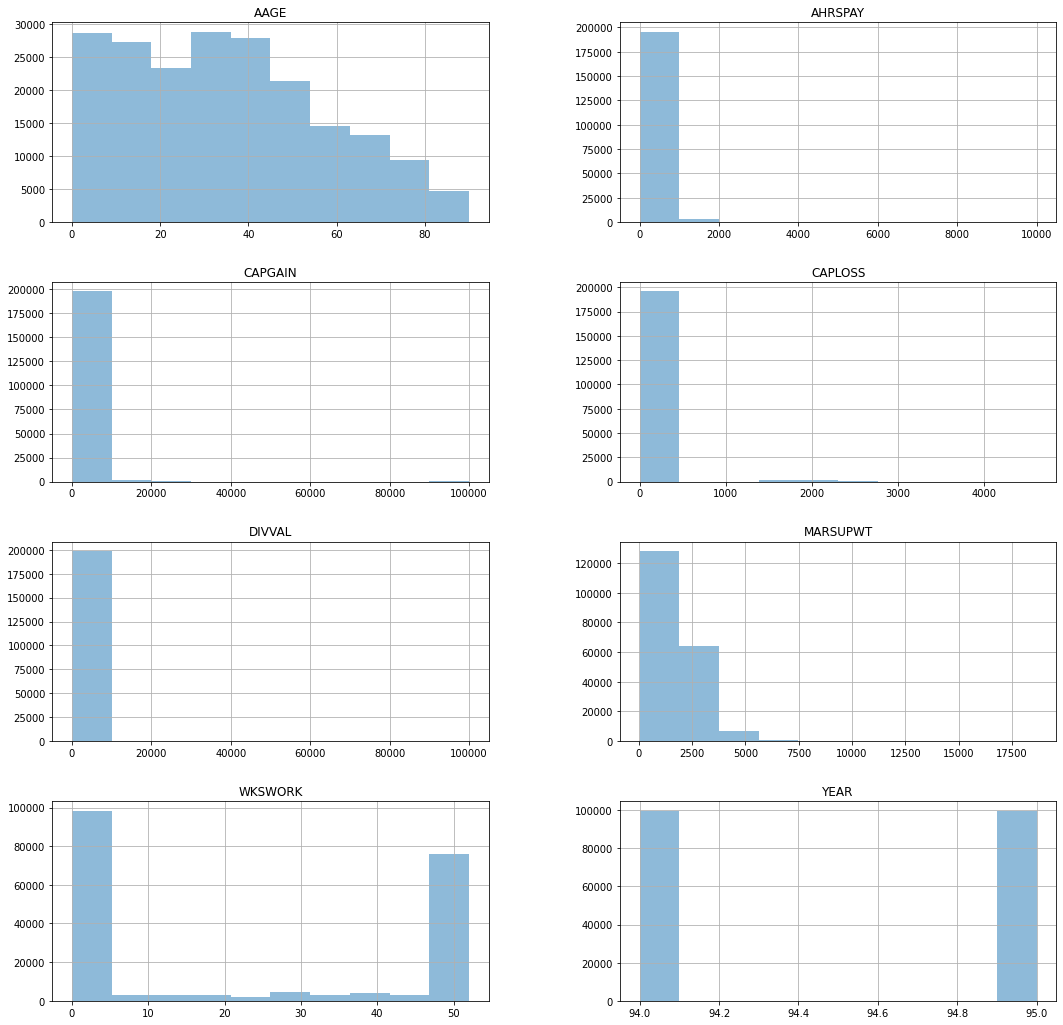

In [94]:
df_for_hist = df_copy[cont_list] 
fig, ax = plt.subplots(4,2,figsize=(18,18)) # get a bigger figure
df_for_hist.hist(bins=10, alpha=0.5, ax=ax) 


### Data Quality Report for Categorical Variables

| Feature | Desc. | Count | % of Missing | Card. | Mode | Mode Freq. | Mode % | 2nd Mode | 2nd Mode Freq. | 2nd Mode Perc | Notes |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| ACLSWKR | class of worker | 199523 | 0 | 9 | Not in universe | 100245 | 50.24 | Private | 72028 | 36.10
| ADTIND | industry code | 199523 | 0 | 52 | 0 | 100684 | 50.46 | 33 | 17070 | 8.56
| ADTOCC | occupation code | 199523 | 0 | 47 | 0 | 100684 | 50.46 | 2 | 8756 | 4.39
| AHGA | education | 199523 | 0 | 17 | High school graduate | 48407 | 24.26 | Children | 47422 | 23.77
| AHSCOL | enrolled in edu inst last wk | 199523 | 0 | 3 | Not in universe | 186943 | 93.69 | High school | 6892 | 3.45
| AMARITL | marital status | 199523 | 0 | 7 | Never married | 86485 | 43.35 | Married-civilian spouse present | 84222 | 42.21
| AMJIND | major industry code | 199523 | 0 | 24 | Not in universe or children | 100684 | 50.46 | Retail trade | 17070 | 8.56
| AMJOCC | major occupation code | 199523 | 0 | 15 | Not in universe | 100684 | 50.46 | Adm support including clerical | 14837 | 7.44
| ARACE | mace | 199523 | 0 | 5 | White | 167365 | 83.88 | Black | 20415 | 10.23
| AREORGN | hispanic Origin | 199523 | 874 | 10 | All other | 171907 | 86.16 | Mexican-American | 8079 | 4.05
| ASEX | sex | 199523 | 0 | 2 | Female | 103984 | 52.12 | Male | 95539 | 47.88
| AUNMEM | member of a labor union | 199523 | 0 | 3 | Not in universe | 180459 | 90.45 | No | 16034 | 8.04
| AUNTYPE | reason for unemployment | 199523 | 0 | 6 | Not in universe | 193453 | 96.96 | Other job loser | 2038 | 1.02
| AWKSTAT | full or part time employment stat | 199523 | 0 | 8 | Children or Armed Forces | 123769 | 62.03 | Full-time schedules | 40736 | 20.42
| FILESTAT | tax filer status | 199523 | 0 | 6 | Nonfiler | 75094 | 37.64 | Joint both under 65 | 67383 | 33.77
| GRINREG | region of previous residence | 199523 | 0 | 6 | Not in universe | 183750 | 92.09 | South | 4889 | 2.45
| GRINST | state of previous residence | 199523 | 0 | 51 | Not in universe | 183750 | 92.09 | California | 1714 | 0.86
| HHDFMX | detailed household and family stat | 199523 | 0 | 38 | Householder | 53248 | 26.69 | Child <18 never marr not in subfamily | 50326 | 25.22
| HHDREL | detailed household summary in household | 199523 | 0 | 8 | Householder | 75475 | 37.83 | Child under 18 never married | 50426 | 25.27
| MIGMTR1 | migration code-change in msa | 199523 | 0 | 10 | ? | 99696 | 49.97 | Nonmover | 82538 | 41.37
| MIGMTR3 | migration code-change in reg | 199523 | 0 | 9 | ? | 99696 | 49.97 | Nonmover | 82538 | 41.37
| MIGMTR4 | migration code-move within reg | 199523 | 0 | 10 | ? | 99696 | 49.97 | Nonmover | 82538 | 41.37
| MIGSAME | live in this house 1 year ago | 199523 | 0 | 3 | Not in universe under 1 year old | 101212 | 50.73 | Yes | 82538 | 41.37
| MIGSUN | migration prev res in sunbelt | 199523 | 0 | 4 | ? | 99696 | 49.97 | Not in universe | 84054 | 42.13
| NOEMP | num persons worked for employer | 199523 | 0 | 7 | 0 | 95983 | 48.11 | 6 | 36511 | 18.30
| PARENT | family members under 18 | 199523 | 0 | 5 | Not in universe | 144232 | 72.29 | Both parents present | 38983 | 19.54
| PEFNTVTY | country of birth father | 199523 | 0 | 43 | United-States | 159163 | 79.77 | Mexico | 10008 | 5.02
| PEMNTVTY | country of birth mother | 199523 | 0 | 43 | United-States | 160479 | 80.43 | Mexico | 9781 | 4.90
| PENATVTY | country of birth self | 199523 | 0 | 43 | United-States | 176989 | 88.71 | Mexico | 5767 | 2.89
| PRCITSHP | citizenship | 199523 | 0 | 5 | Native- Born in the United States | 176992 | 88.71 | Foreign born- Not a citizen of U S  | 13401 | 6.72
| SEOTR | own business or self employed | 199523 | 0 | 3 | 0 | 180672 | 90.55 | 2 | 16153 | 8.10
| VETQVA | fill inc questionnaire for veterans admin | 199523 | 0 | 3 | Not in universe | 197539 | 99.01 | No | 1593 | 0.80
| VETYN | veterans benefits | 199523 | 0 | 3 | 2 | 150130 | 75.24 | 0 | 47409 | 23.76
| PTOTVALB | PTOTVALB | 199523 | 0 | 2 | - 50000. | 187141 | 93.79 | 50000+. | 12382 | 6.21


###Bar plots for categorical variables

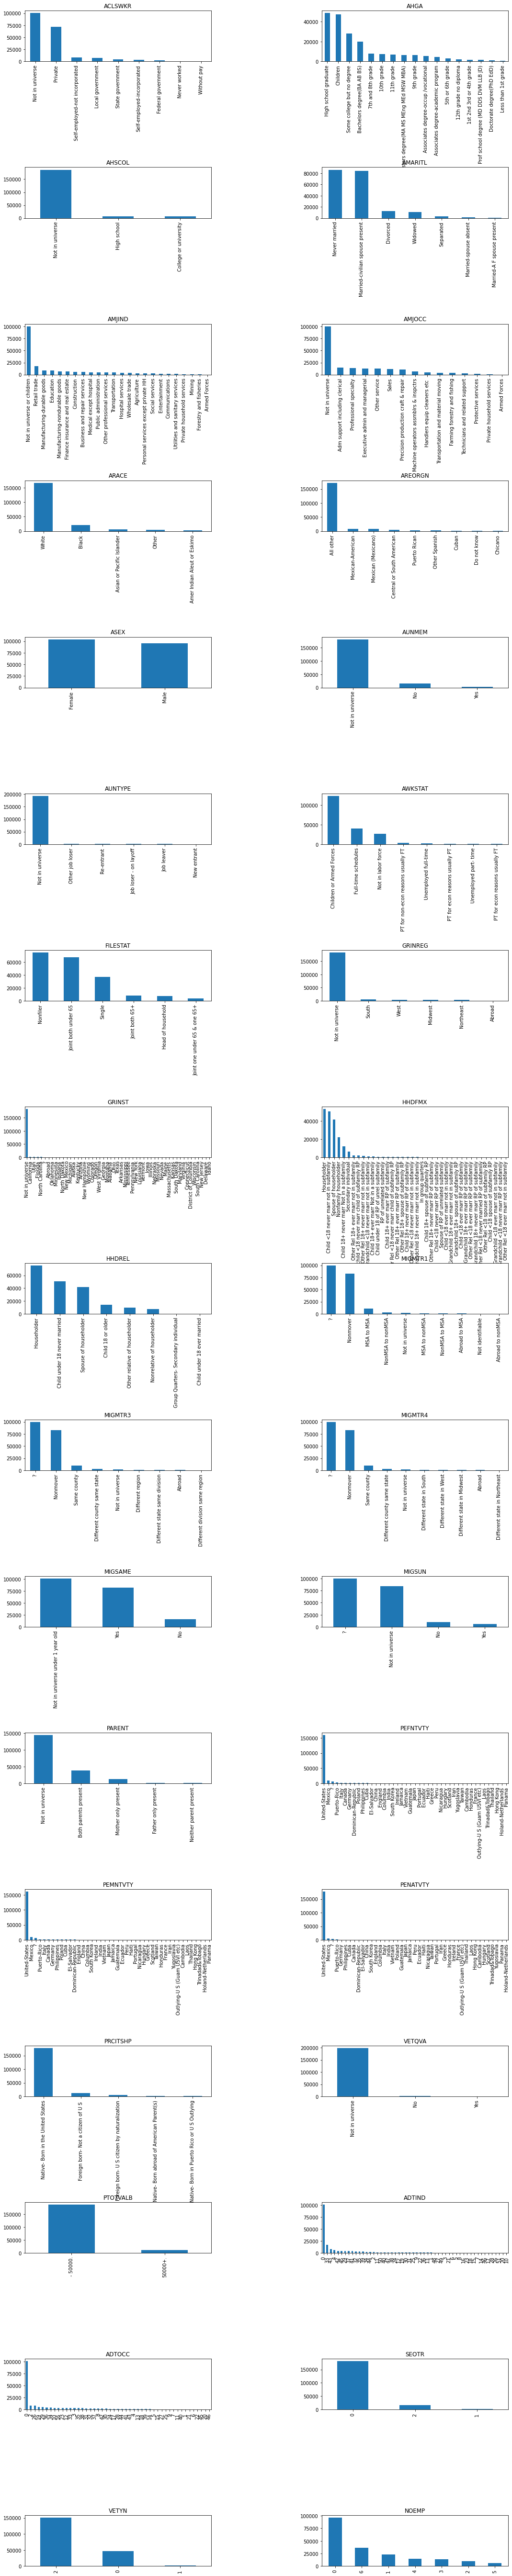

In [73]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(17,2,figsize=(20,80)) # get a bigger figure
fig.tight_layout(pad=20.0)
i = 0
axe = ax.ravel()
for (name,series) in df_copy[not_continuous].iteritems():
  axe[i].title.set_text(name)
  series.value_counts().plot(kind='bar',ax=axe[i])
  i+=1


### Q2 - Identify the data quality issues for each attribute. Create a data quality plan and implement the changes. [35 pts] 

Identify missing values, potential anomalies and outliers. Finally, remedy these issues.

| Feature | Data Quality Issue | Potential Handling Strategies |
| --- | --- | --- |
|AAGE|CONTAINS OUTLIERS|Clamp
|MARSUPWT|CONTAINS OUTLIERS|Clamp
|AHRSPAY| Q1-Q3 ZERO| DROP COLUMN
|CAPGAIN|Q1-Q3 ZERO|DROP COLUMN
|CAPLOSS|Q1-Q3 ZERO|DROP COLUMN
|DIVVAL|Q1-Q3 ZERO|DROP COLUMN
|WKSWORK|outliers exist|clamping
|ACLSWKR|NIU value/missing value|nothing 50%
|AHSCOL|NIU value/missing value|drop column 90%
|AMJIND|NIU value/missing value|nothing 50%
|AMJOOC|NIU value/missing value|nothing 50%
|AUNMEM|NIU value/missing value|drop column 90%
|AUNTYPE|NIU value/missing value|drop column 90%
|GRINREG|NIU value/missing value|drop column 90%
|GRINST|NIU value/missing value|drop column 90%
|MIGMTR1|MISSING VALUES|DROP COLUMN MODE1&2 together bad
|MIGMTR3|MISSING VALUES|DROP COLUMN MODE1&2 together bad
|MIGMTR4|MISSING VALUES|DROP COLUMN MODE1&2 together bad
|MIGSAME|MISSING VALUES|do nothing 50%
|MIGSUN|MISSING VALUES|DROP COLUMN MODE 1 & 2 BOTH BAD
|VETQVA|MISSING VALUES|DROP COLOMN 90%+
|PTOTVALB|INFORMATION ON COLUMN IS LIMITED|DROP COLUMN 


Because imputation is not recommended for nulls more than 30% of dataset, it was not a valid choice. When nulls become the majority of the dataset, depending on the problem you are dealing with it may be useful to drop the column, fill in null with defaults (already done by currator), or drop the null rows for specific problems, which aren't listed here. 

In [96]:
df_copy.AREORGN.unique()

array(['All other', 'Do not know', 'Central or South American',
       'Mexican (Mexicano)', 'Mexican-American', 'Other Spanish',
       'Puerto Rican', 'Cuban', 'Chicano', nan], dtype=object)

In [19]:
drop_columns = ['AHRSPAY','CAPGAIN','CAPLOSS','DIVVAL','AHSCOL','AUNMEM','AUNTYPE','GRINREG','GRINST','MIGMTR1','MIGMTR3','MIGMTR4','MIGSUN','VETQVA','PTOTVALB']


In [20]:
print(df.columns)

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL',
       'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM',
       'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FILESTAT',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MARSUPWT', 'MIGMTR1',
       'MIGMTR3', 'MIGMTR4', 'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT',
       'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA',
       'VETYN', 'WKSWORK', 'YEAR', 'PTOTVALB'],
      dtype='object')


In [21]:
df = df.drop(drop_columns, axis = 1)


In [22]:
for (name, series) in df.iteritems():
  if name in not_continuous and name not in drop_columns:

    modes= series.value_counts().keys()
    card = series.size
    mode1= modes[0]
    mode2= modes[1]
    mode1count= series.value_counts()[mode1]
    mode2count= series.value_counts()[mode2]
    mode1percent = "{:.2f}".format(mode1count*100.0/float(card))
    mode2percent = "{:.2f}".format(mode2count*100.0/float(card))
  
    print("|",name,"|",
          column_desc[name],"|",
          series.size,"|",
          series.isnull().sum(),"|",
          series.unique().size,"|",
          mode1,"|",mode1count,"|",mode1percent,"|",
          mode2,"|",mode2count,"|",mode2percent
          )
    
  

| ACLSWKR | class of worker | 199523 | 0 | 9 | Not in universe | 100245 | 50.24 | Private | 72028 | 36.10
| ADTIND | industry code | 199523 | 0 | 52 | 0 | 100684 | 50.46 | 33 | 17070 | 8.56
| ADTOCC | occupation code | 199523 | 0 | 47 | 0 | 100684 | 50.46 | 2 | 8756 | 4.39
| AHGA | education | 199523 | 0 | 17 | High school graduate | 48407 | 24.26 | Children | 47422 | 23.77
| AMARITL | marital status | 199523 | 0 | 7 | Never married | 86485 | 43.35 | Married-civilian spouse present | 84222 | 42.21
| AMJIND | major industry code | 199523 | 0 | 24 | Not in universe or children | 100684 | 50.46 | Retail trade | 17070 | 8.56
| AMJOCC | major occupation code | 199523 | 0 | 15 | Not in universe | 100684 | 50.46 | Adm support including clerical | 14837 | 7.44
| ARACE | mace | 199523 | 0 | 5 | White | 167365 | 83.88 | Black | 20415 | 10.23
| AREORGN | hispanic Origin | 199523 | 874 | 10 | All other | 171907 | 86.16 | Mexican-American | 8079 | 4.05
| ASEX | sex | 199523 | 0 | 2 | Female | 10398

In [23]:
clamped = []
  
for (name, series) in df.iteritems():
  if name not in not_continuous and name not in drop_columns:
    try:
      q1 = series.quantile(0.25)
      q3 = series.quantile(0.75)
      stdev = series.std() 

      if np.abs(q3-q1) >1.5*stdev:
        clamped.append(name)
        df.loc[series>(q3+stdev),name] = q3+stdev
        df.loc[series<(q1-stdev),name] = q1-stdev
      #| Feature | Desc. | Count | % of Missing | Card. | Min. | Q1 | Median | Q3 | Max. | Mean | Std. Dev. | Notes |
      series = df[name]
      min = '{:.2f}'.format(series.min())
      q1 = '{:.2f}'.format(series.quantile(0.25))
      median = '{}'.format(series.median())
      q3 = '{:.2f}'.format(series.quantile(0.75))
      max = '{:.2f}'.format(series.max())
      mean = '{:.2f}'.format(series.mean())
      stdev = '{:.2f}'.format(series.std()) 
      
      print("|", name,"|",
            column_desc[name],"|",
            series.size,"|",
            series.isnull().sum(),"|",
            series.unique().size,"|",
            min,"|",
            q1,"|",
            median, "|",
            q3,"|",
            max,"|",
            mean,"|",
            stdev,"|"
            )
    except:
        print(series.name, ' is not continuous')
print('clamped',clamped)

| AAGE | Age | 199523 | 0 | 74 | 0.00 | 15.00 | 33.0 | 50.00 | 72.31 | 34.05 | 21.42 |
| MARSUPWT | instance weight | 199523 | 0 | 99800 | 37.87 | 1061.62 | 1618.31 | 2188.61 | 18656.30 | 1740.38 | 993.77 |
| WKSWORK | weeks worked in year | 199523 | 0 | 53 | 0.00 | 0.00 | 8.0 | 52.00 | 52.00 | 23.17 | 24.41 |
| YEAR | YEAR | 199523 | 0 | 2 | 94.00 | 94.00 | 94.0 | 95.00 | 95.00 | 94.50 | 0.50 |
clamped ['AAGE', 'WKSWORK', 'YEAR']


Categorical revision

| Feature | Desc. | Count | % of Missing | Card. | Mode | Mode Freq. | Mode % | 2nd Mode | 2nd Mode Freq. | 2nd Mode Perc | Notes |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| ACLSWKR | class of worker | 199523 | 0 | 9 | Not in universe | 100245 | 50.24 | Private | 72028 | 36.10
| ADTIND | industry code | 199523 | 0 | 52 | 0 | 100684 | 50.46 | 33 | 17070 | 8.56
| ADTOCC | occupation code | 199523 | 0 | 47 | 0 | 100684 | 50.46 | 2 | 8756 | 4.39
| AHGA | education | 199523 | 0 | 17 | High school graduate | 48407 | 24.26 | Children | 47422 | 23.77
| AMARITL | marital status | 199523 | 0 | 7 | Never married | 86485 | 43.35 | Married-civilian spouse present | 84222 | 42.21
| AMJIND | major industry code | 199523 | 0 | 24 | Not in universe or children | 100684 | 50.46 | Retail trade | 17070 | 8.56
| AMJOCC | major occupation code | 199523 | 0 | 15 | Not in universe | 100684 | 50.46 | Adm support including clerical | 14837 | 7.44
| ARACE | mace | 199523 | 0 | 5 | White | 167365 | 83.88 | Black | 20415 | 10.23
| AREORGN | hispanic Origin | 199523 | 874 | 10 | All other | 171907 | 86.16 | Mexican-American | 8079 | 4.05
| ASEX | sex | 199523 | 0 | 2 | Female | 103984 | 52.12 | Male | 95539 | 47.88
| AWKSTAT | full or part time employment stat | 199523 | 0 | 8 | Children or Armed Forces | 123769 | 62.03 | Full-time schedules | 40736 | 20.42
| FILESTAT | tax filer status | 199523 | 0 | 6 | Nonfiler | 75094 | 37.64 | Joint both under 65 | 67383 | 33.77
| HHDFMX | detailed household and family stat | 199523 | 0 | 38 | Householder | 53248 | 26.69 | Child <18 never marr not in subfamily | 50326 | 25.22
| HHDREL | detailed household summary in household | 199523 | 0 | 8 | Householder | 75475 | 37.83 | Child under 18 never married | 50426 | 25.27
| MIGSAME | live in this house 1 year ago | 199523 | 0 | 3 | Not in universe under 1 year old | 101212 | 50.73 | Yes | 82538 | 41.37
| NOEMP | num persons worked for employer | 199523 | 0 | 7 | 0 | 95983 | 48.11 | 6 | 36511 | 18.30
| PARENT | family members under 18 | 199523 | 0 | 5 | Not in universe | 144232 | 72.29 | Both parents present | 38983 | 19.54
| PEFNTVTY | country of birth father | 199523 | 0 | 43 | United-States | 159163 | 79.77 | Mexico | 10008 | 5.02
| PEMNTVTY | country of birth mother | 199523 | 0 | 43 | United-States | 160479 | 80.43 | Mexico | 9781 | 4.90
| PENATVTY | country of birth self | 199523 | 0 | 43 | United-States | 176989 | 88.71 | Mexico | 5767 | 2.89
| PRCITSHP | citizenship | 199523 | 0 | 5 | Native- Born in the United States | 176992 | 88.71 | Foreign born- Not a citizen of U S  | 13401 | 6.72
| SEOTR | own business or self employed | 199523 | 0 | 3 | 0 | 180672 | 90.55 | 2 | 16153 | 8.10
| VETYN | veterans benefits | 199523 | 0 | 3 | 2 | 150130 | 75.24 | 0 | 47409 | 23.76

Continuous revision


| Feature | Desc. | Count | % of Missing | Card. | Min. | Q1 | Median | Q3 | Max. | Mean | Std. Dev. | Notes |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| AAGE | Age | 199523 | 0 | 74 | 0.00 | 15.00 | 33.0 | 50.00 | 72.31 | 34.05 | 21.42 |
| MARSUPWT | instance weight | 199523 | 0 | 99800 | 37.87 | 1061.62 | 1618.31 | 2188.61 | 18656.30 | 1740.38 | 993.77 |
| WKSWORK | weeks worked in year | 199523 | 0 | 53 | 0.00 | 0.00 | 8.0 | 52.00 | 52.00 | 23.17 | 24.41 |
| YEAR | YEAR | 199523 | 0 | 2 | 94.00 | 94.00 | 94.0 | 95.00 | 95.00 | 94.50 | 0.50 |



*italicized text*### Q3 - For all the interval and ratio scale features, create a scatter plot matrix (pairplots) and correlation matrix. For all ordinal scale features, create a correlation matrix using Spearman correlation. [35 pts]

Use the data scales list you created in Q1.

In [24]:
# your code goes here

In [25]:
continuous_vars = ['AAGE','AHRSPAY',
'CAPGAIN',
'CAPLOSS',
'DIVVAL',
'MARSUPWT',
'WKSWORK',
'YEAR']


In [26]:
contdf = df_copy[continuous_vars]



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0ebfedbd0>,
      dtype=object)

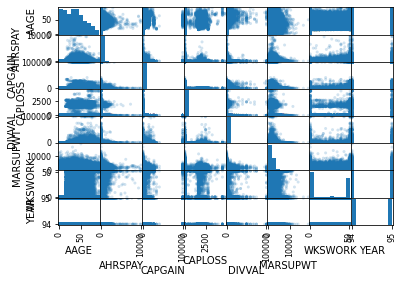

In [27]:
pd.plotting.scatter_matrix(contdf, alpha=0.2)

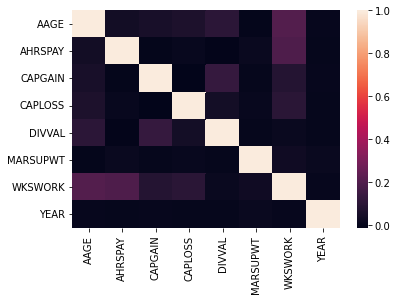

In [28]:
import seaborn as sns
correlations = contdf.corr()
sns.heatmap(correlations)